#CSM2024 : Homework 2

##Problem 1

###1b

In [ ]:
'''
Use this expression to make a plot of the fractional error in the binding
probability from assuming ligand is in excess as a function of $L_{\mathrm{tot}}$.
Take R_{tot} = K_d = 50 nM. Interpret your result.
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R_tot = 50  # nM
K_d = 50  # nM

# Define the fractional occupancy ([RL]/R_tot)
def frac_occupancy(L_tot, R_tot, K_d):
    term1 = (R_tot + L_tot + K_d)
    term2 = np.sqrt((R_tot + L_tot + K_d)**2 - 4 * R_tot * L_tot)
    return (term1 - term2) / (2 * R_tot)

# fractional occupancy assuming ligand is in excess
def frac_occupancy_L_excess(L_tot, K_d):
    return L_tot / (K_d + L_tot)

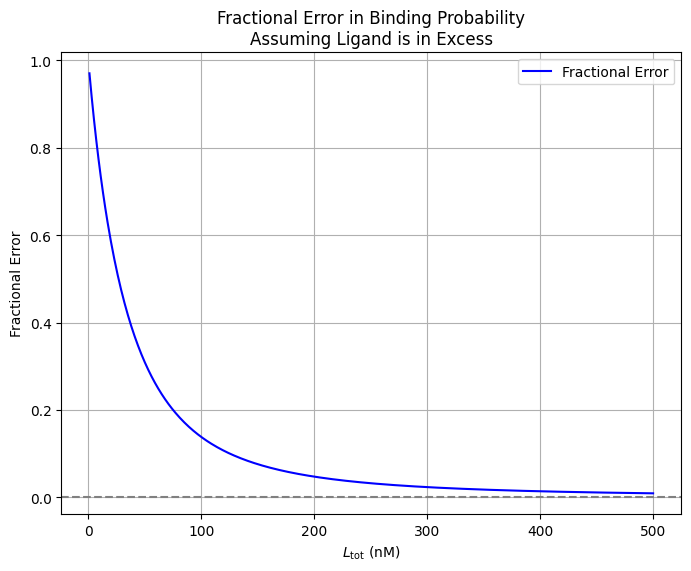

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# Range of L_tot values (0 to 500 nM)
L_tot_values = np.linspace(1, 500, 500)

# Calculate the true fractional occupancy and excess ligand fractional occupancy
true_occ_values = np.array([frac_occupancy(L_tot, R_tot, K_d) for L_tot in L_tot_values])
occ_excess_values = np.array([frac_occupancy_L_excess(L_tot, K_d) for L_tot in L_tot_values])

# Calculate fractional error
# error = ((excess - true) / true)
fractional_error = (occ_excess_values - true_occ_values) / true_occ_values

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(L_tot_values, fractional_error, label='Fractional Error', color='b')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r'$L_{\mathrm{tot}}$ (nM)')
plt.ylabel('Fractional Error')
plt.title('Fractional Error in Binding Probability\nAssuming Ligand is in Excess')
plt.grid(True)
plt.legend()
plt.savefig('1b.png')
plt.show()

#download fig
from google.colab import files

# Download the saved figure
files.download('1b.png')

###1c

In [ ]:
'''
Fit the binding curves measured by Maeda et al. for binding of sigma70 to RNA polymerase
assuming the sigma70 concentration is 0.4 nM using the expression you derived in part (a).

Also fit the same data assuming that L is in excess. Plot the fits and report the values of Kd you obtain in each case.
Note that the receptor in this case is sigma70 and the ligand concentrations are given in nM. What are your conclusions?
'''

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
sig70_R_tot = 0.4  # nM, concentration of sigma^70 (receptor)

# Data: Ligand concentrations and measured percent bound values
ligand_conc = np.array([0, 5.18E-02, 9.99E-02, 1.98E-01, 4.04E-01, 6.04E-01, 8.05E-01])
percent_bound = np.array([0, 1.28E+01, 2.68E+01, 5.04E+01, 7.97E+01, 9.97E+01, 9.90E+01])

# Convert percent bound to fractional occupancy
fraction_bound = percent_bound / 100

In [ ]:
# Define the true fractional occupancy model (without assuming ligand is in excess)
def true_fractional_occupancy(L_tot, R_tot, K_d):
    term1 = (R_tot + L_tot + K_d)
    term2 = np.sqrt((R_tot + L_tot + K_d)**2 - 4 * R_tot * L_tot)
    return (term1 - term2) / (2 * R_tot)

# Define the ligand excess model for fractional occupancy
def excess_ligand_fractional_occupancy(L_tot, K_d):
    return L_tot / (K_d + L_tot)

In [ ]:
# Fit the data using the true fractional occupancy model
fit_true, _ = curve_fit(lambda L, K_d: true_fractional_occupancy(L, sig70_R_tot, K_d), ligand_conc, fraction_bound)
K_d_true_fit = fit_true[0]

# Fit the data using the excess ligand model
fit_excess, _ = curve_fit(excess_ligand_fractional_occupancy, ligand_conc, fraction_bound)
K_d_excess_fit = fit_excess[0]

# Generate fit curves
L_range = np.linspace(0, max(ligand_conc), 100)
fit_true = true_fractional_occupancy(L_range, sig70_R_tot, K_d_true_fit)
fit_excess = excess_ligand_fractional_occupancy(L_range, K_d_excess_fit)

# Function to estimate Kd where fraction_bound = 0.5 using interpolation
def find_kd(L, f_bound, target_fraction=0.5):
    return np.interp(target_fraction, f_bound, L)

# Find Kd from the true model fit (at fraction bound = 0.5)
K_d_true_interpolated = find_kd(L_range, fit_true)

# Find Kd from the excess ligand model fit (at fraction bound = 0.5)
K_d_excess_interpolated = find_kd(L_range, fit_excess)

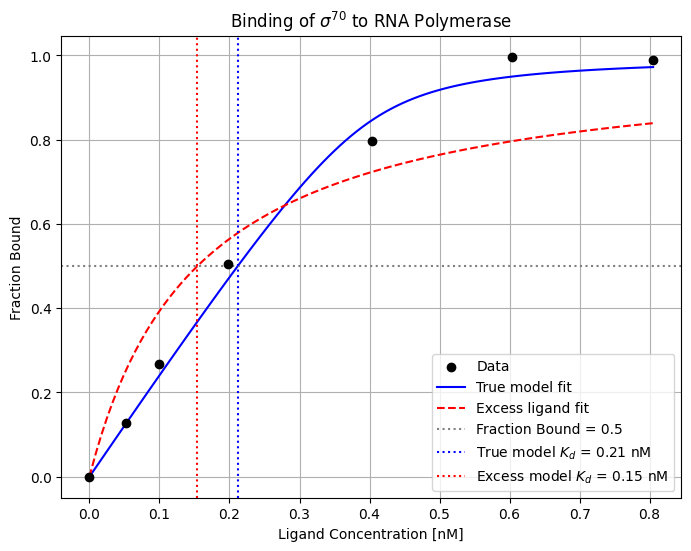

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K_d (interpolated from true model fit at fraction bound = 0.5): 0.21 nM
K_d (interpolated from excess ligand fit at fraction bound = 0.5): 0.15 nM


In [18]:
# Plot data and fits
plt.figure(figsize=(8, 6))
plt.scatter(ligand_conc, fraction_bound, label='Data', color='black', zorder=5)
plt.plot(L_range, fit_true, label=f'True model fit' , color='blue')
plt.plot(L_range, fit_excess, label=f'Excess ligand fit', color='red', linestyle='--')

# Add lines
plt.axhline(y=0.5, color='gray', linestyle=':', label='Fraction Bound = 0.5')
plt.axvline(x=K_d_true_interpolated, color='blue', linestyle=':', label=f'True model $K_d$ = {K_d_true_interpolated:.2f} nM')
plt.axvline(x=K_d_excess_interpolated, color='red', linestyle=':', label=f'Excess model $K_d$ = {K_d_excess_interpolated:.2f} nM')

# Labels, legend
plt.xlabel('Ligand Concentration [nM]')
plt.ylabel('Fraction Bound')
plt.title('Binding of $\sigma^{70}$ to RNA Polymerase')
plt.grid(True)
plt.legend()
plt.savefig('1c.png')
plt.show()

#download fig
from google.colab import files

# Download the fig
files.download('1c.png')
plt.show()

# Print the interpolated K_d values where fraction bound = 0.5
print(f"K_d (interpolated from true model fit at fraction bound = 0.5): {K_d_true_interpolated:.2f} nM")
print(f"K_d (interpolated from excess ligand fit at fraction bound = 0.5): {K_d_excess_interpolated:.2f} nM")


##Problem 2

###2a

In [ ]:
'''
Write a program to detect all 1, 2, and 3-mode motifs in a directed graph network.
The input is a list of pairs of numbers indicating the source and target for each regulatory interaction.

Apply your program to the E. coli network graph given. Be sure to avoid overcounting subgraphs that occurs when a simple
subgraph appears in a more complex one. In addition to your code provide a succinct description of
the logic you used to find subgraphs and to avoid overcounting.
'''

In [1]:
import pandas as pd
from itertools import combinations
import networkx as nx

In [2]:
# Upload E. Coli data
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving coliInterFullVec.txt to coliInterFullVec.txt


In [3]:
df = pd.read_csv("coliInterFullVec.txt", sep=" ", header=None)
df.columns = ["source", "target", "type"]
df.head()

,source,target,type
0,3,4,2
1,6,6,3
2,11,6,1
3,14,6,1
4,8,9,1


In [4]:
# Create graph object
coli_net = nx.DiGraph()

# Add edges from the df source and target columns
for _, row in df.iterrows():
    coli_net.add_edge(row['source'], row['target'])


In [5]:
# Detect motifs, categorize them
def detect_and_categorize_motifs(graph, max_mode=3):
    nodes = list(graph.nodes)
    motifs = {'1-node': [], '2-node': [], '3-node': []}
    found_motifs = set()  # Set to track unique motifs

    #iterate over 1-node, 2-node, and 3-node subgraphs
    for n in range(1, max_mode + 1):
        for sub_nodes in combinations(nodes, n):
            sub_graph = graph.subgraph(sub_nodes)
            if len(sub_graph.edges) > 0:  # Only consider valid subgraphs
                canonical_motif = canonical_form(sub_graph)
                if canonical_motif not in found_motifs:  # Avoid overcounting
                    found_motifs.add(canonical_motif)
                    if n == 1:
                        motifs['1-node'].append(sub_graph)
                    elif n == 2:
                        motifs['2-node'].append(categorize_2_node_motif(sub_graph))
                    elif n == 3:
                        motifs['3-node'].append(categorize_3_node_motif(sub_graph))

    return motifs

#  get canonical form
def canonical_form(subgraph):
    return tuple(nx.adjacency_matrix(subgraph).toarray().flatten())

# categorize 2-node and 3-node motifs
def categorize_2_node_motif(subgraph):
    edges = list(subgraph.edges)
    if len(edges) == 1:
        return 'Simple regulation (1 edge)'
    elif len(edges) == 2 and (edges[0][1] == edges[1][0]):  # Reciprocal connection
        return 'Reciprocal regulation (2 edges)'
    return 'Other 2-node motif'

def categorize_3_node_motif(subgraph):
    edges = list(subgraph.edges)
    if len(edges) == 3:
        return 'Fully connected 3-node motif'
    elif len(edges) == 2:
        return '2-edge 3-node motif'
    elif len(edges) == 1:
        return '1-edge 3-node motif'
    return 'Other 3-node motif'

In [5]:
# Detect and categorize motifs in the graph
motifs = detect_and_categorize_motifs(coli_net, max_mode=3)

#  Print motifs
def print_motifs(motif_dict):
    for motif_type, motif_list in motif_dict.items():
        print(f"\n{motif_type}: {len(motif_list)} motifs found")
        for i, motif in enumerate(motif_list):
            print(f"  Motif {i + 1}: {motif}")


print_motifs(motifs)


1-node: 1 motifs found
  Motif 1: DiGraph with 1 nodes and 1 edges

2-node: 11 motifs found
  Motif 1: Simple regulation (1 edge)
  Motif 2: Simple regulation (1 edge)
  Motif 3: Simple regulation (1 edge)
  Motif 4: Reciprocal regulation (2 edges)
  Motif 5: Other 2-node motif
  Motif 6: Other 2-node motif
  Motif 7: Simple regulation (1 edge)
  Motif 8: Other 2-node motif
  Motif 9: Other 2-node motif
  Motif 10: Reciprocal regulation (2 edges)
  Motif 11: Other 2-node motif

3-node: 142 motifs found
  Motif 1: 2-edge 3-node motif
  Motif 2: 1-edge 3-node motif
  Motif 3: 1-edge 3-node motif
  Motif 4: 2-edge 3-node motif
  Motif 5: 2-edge 3-node motif
  Motif 6: 2-edge 3-node motif
  Motif 7: 1-edge 3-node motif
  Motif 8: 1-edge 3-node motif
  Motif 9: 2-edge 3-node motif
  Motif 10: 2-edge 3-node motif
  Motif 11: 1-edge 3-node motif
  Motif 12: 1-edge 3-node motif
  Motif 13: 1-edge 3-node motif
  Motif 14: 2-edge 3-node motif
  Motif 15: Fully connected 3-node motif
  Motif 16:

###2b

In [ ]:
'''
Write a program to generate ER networks with a given number of nodes and edges and use it to perform an analysis
of your results in part (a) to determine which subgraphs are motifs or anti-motifs. Justify your choice of criteria for selecting these.
'''

In [ ]:
import networkx as nx
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import random
from collections import Counter

In [ ]:
# generate an ER network
def generate_er_network(num_nodes, num_edges):
    graph = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
    return graph

# count motif frequencies in a given graph
def count_motifs_in_graph(graph):
    motif_counts = Counter()
    motifs = detect_and_categorize_motifs(graph)
    for size in motifs:
        motif_counts.update([m for m in motifs[size]])
    return motif_counts

In [6]:
# analyze motifs and anti-motifs
def analyze_motifs(real_graph, er_graphs):
    real_motif_counts = count_motifs_in_graph(real_graph)

    er_motif_counts = Counter()
    for er_graph in er_graphs:
        er_motif_counts.update(count_motifs_in_graph(er_graph))

    # Averaging - Normalize ER counts by the number of ER networks
    num_er_graphs = len(er_graphs)
    er_motif_counts = {k: v / num_er_graphs for k, v in er_motif_counts.items()}

    # Compare real graph counts with ER network counts
    motifs = {}
    anti_motifs = {}

    for motif, count in real_motif_counts.items():
        er_count = er_motif_counts.get(motif, 0)
        if count > er_count:
            motifs[motif] = (count, er_count)
        elif count < er_count:
            anti_motifs[motif] = (count, er_count)

    return motifs, anti_motifs


In [8]:
# Generate ER networks
num_er_networks = 1000
num_nodes = coli_net.number_of_nodes()
num_edges = coli_net.number_of_edges()
er_networks = [generate_er_network(num_nodes, num_edges) for _ in range(num_er_networks)]

# Perform motif and anti-motif analysis
motifs, anti_motifs = analyze_motifs(coli_net, er_networks)

# results
print("Motifs (real > ER):")
for motif, counts in motifs.items():
    print(f"Motif: {motif}, Real Count: {counts[0]}, ER Count: {counts[1]}")

print("\nAnti-Motifs (real < ER):")
for motif, counts in anti_motifs.items():
    print(f"Motif: {motif}, Real Count: {counts[0]}, ER Count: {counts[1]}")

KeyboardInterrupt: 

Terminated at 47 min runtime: too long to execute

##Problem 4

###4a

In [ ]:
'''
Determine the response time for a linear model of positive autoregulation given by
$$ \frac{dX}{dt} = \beta + \beta_1 X - \alpha X$$
What assumptions do you need to make about the parameters?
'''

ODEs for each species $X,Y,Z$

X:
$$\frac{dX}{dt} = \beta_x - \alpha X$$

Y:
$$\frac{dY}{dt} = \beta_yX*(X > K_{XY}) - \alpha Y$$

Z:
$$\frac{dZ}{dt} = \beta_ZX*(X > K_{XY})(Y < K_{YZ})- \alpha Z$$


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint

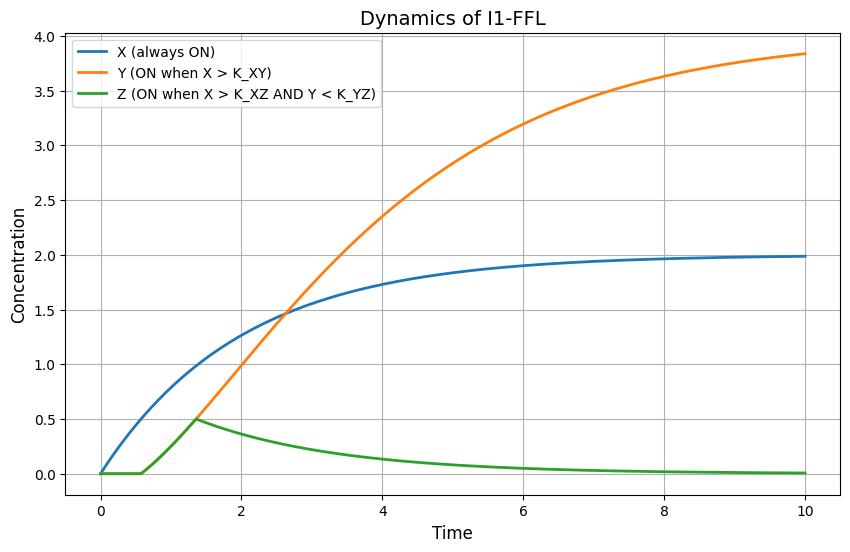

In [21]:
# Degradation rate (same for all: X,Y,Z)
alpha = 0.5

# Production rates
beta_X = 1.0
beta_Y = 1.0
beta_Z = 1.0

# Thresholds
K_XY = 0.5
K_XZ = 0.5
K_YZ = 0.5

# Define the system of ODEs
def I1FFL(vars, t, beta_X, beta_Y, beta_Z, K_XY, K_XZ, K_YZ, alpha):
    X, Y, Z = vars

    # ODE for X (always ON)
    dXdt = beta_X - alpha * X

    # ODE for Y (conditional on X > K_XY)
    dYdt = beta_Y * X * (X > K_XY) - alpha * Y

    # ODE for Z (conditional on X > K_XZ and Y < K_YZ)
    dZdt = beta_Z * X * (X > K_XZ) * (Y < K_YZ) - alpha * Z

    return [dXdt, dYdt, dZdt]

# Initial conds
X0 = 0.0
Y0 = 0.0
Z0 = 0.0
initial_conditions = [X0, Y0, Z0]

# Time vector
t = np.linspace(0, 10, 500)

# Solve ODEs
solution = odeint(I1FFL, initial_conditions, t, args=(beta_X, beta_Y, beta_Z, K_XY, K_XZ, K_YZ, alpha))
X, Y, Z = solution.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='X (always ON)', linewidth=2)
plt.plot(t, Y, label='Y (ON when X > K_XY)', linewidth=2)
plt.plot(t, Z, label='Z (ON when X > K_XZ AND Y < K_YZ)', linewidth=2)
plt.title('Dynamics of I1-FFL', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('3a.png')
plt.show()


In [11]:
#download fig
from google.colab import files

# Download the saved figure
files.download('3a.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

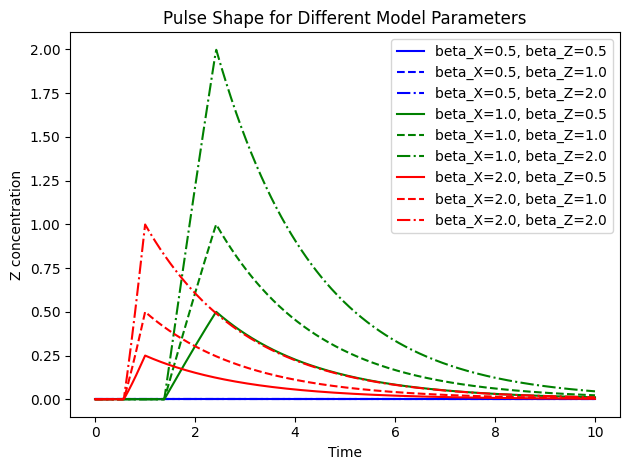

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Parameter ranges to explore for pulse shape (height and width)
beta_X_values = [0.5, 1.0, 2.0]   # Production rate for X
beta_Z_values = [0.5, 1.0, 2.0]   # Production rate for Z
K_XZ_values = [0.5, 1.0, 2.0]
K_YZ_values = [0.5, 1.0, 2.0]

colors = ['b', 'g', 'r']
linestyles = ['-', '--', '-.']

for i, beta_X in enumerate(beta_X_values):
    for j, beta_Z in enumerate(beta_Z_values):

        K_XZ = 1.0  # threshold for X
        K_YZ = 1.0  # threshold for Y

        # Integrate the ODEs
        solution = odeint(I1FFL, initial_conditions, t, args=(beta_X, beta_X, beta_Z, K_XZ, K_XZ, K_YZ, alpha))
        X, Y, Z = solution.T

        # Plot the pulse shape of Z with different color and linestyle
        plt.plot(t, Z, label=f'beta_X={beta_X}, beta_Z={beta_Z}', color=colors[i], linestyle=linestyles[j])

# plot
plt.xlabel('Time')
plt.ylabel('Z concentration')
plt.title('Pulse Shape for Different Model Parameters')

plt.legend()
plt.tight_layout()
plt.savefig('3a.png')
plt.show()

#download fig
from google.colab import files

# Download the saved figure
files.download('3a.png')

###4c

In [ ]:
'''
Design thresholds such that genes $Z_1$ and $Z_2$ regulated by the same circuit
turn on and off in the same order and make a figure illustrating why this design works.
'''

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

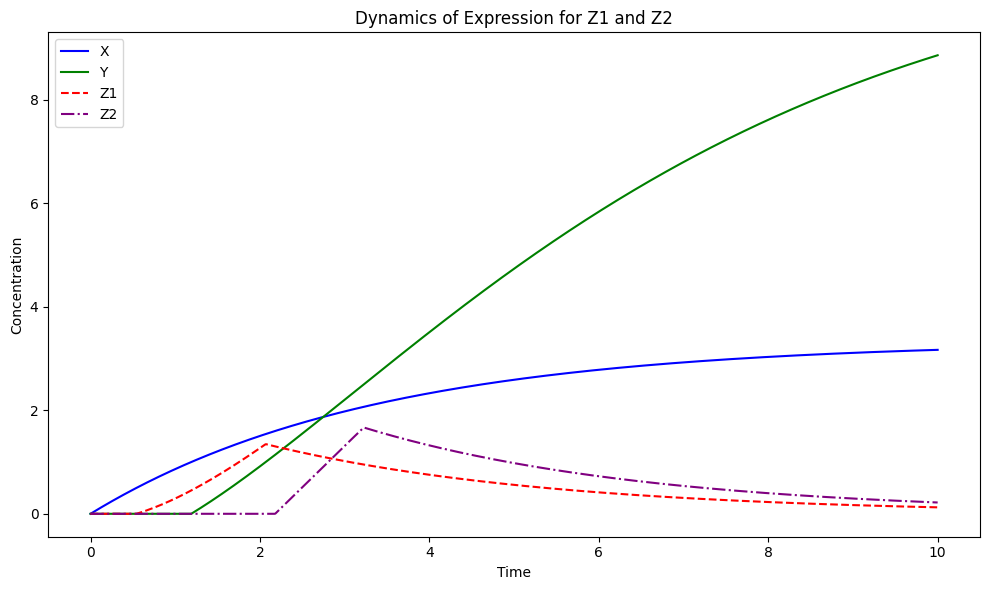

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
def I1FFL_2Z(vars, t, beta_X, beta_Y, beta_Z1, beta_Z2, K_XZ1, K_XZ2, K_YZ1, K_YZ2, alpha):
    X, Y, Z1, Z2 = vars

    # ODE for X (always ON)
    dXdt = beta_X - alpha * X

    # ODE for Y (conditional on X > K_XY)
    dYdt = beta_Y * X * (X > 1.0) - alpha * Y  # Fixed threshold for X -> Y

    # ODE for Z1 (conditional on X > K_XZ1 and Y < K_YZ1)
    dZ1dt = beta_Z1 * X * (X > K_XZ1) * (Y < K_YZ1) - alpha * Z1

    # ODE for Z2 (conditional on X > K_XZ2 and Y < K_YZ2)
    dZ2dt = beta_Z2 * X * (X > K_XZ2) * (Y < K_YZ2) - alpha * Z2

    return [dXdt, dYdt, dZ1dt, dZ2dt]


alpha = 0.3  # Degradation rate
t = np.linspace(0, 10, 1000)
initial_conditions = [0, 0, 0, 0]  # X, Y, Z1, Z2

# beta values
beta_X = 1.0
beta_Y = 1.0
beta_Z1 = 1.0
beta_Z2 = 1.0

# Set threshold values
K_XZ1 = 0.5  # Lower threshold for Z1 to turn on first
K_XZ2 = 1.6  # Higher threshold for Z2 to turn on after Z1
K_YZ1 = 1.0  # Lower threshold for Z1 to turn off first
K_YZ2 = 2.5  # Higher threshold for Z2 to turn off after Z1

# Solve ODEs
solution = odeint(I1FFL_2Z, initial_conditions, t, args=(beta_X, beta_Y, beta_Z1, beta_Z2, K_XZ1, K_XZ2, K_YZ1, K_YZ2, alpha))
X, Y, Z1, Z2 = solution.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='X', color='b')
plt.plot(t, Y, label='Y', color='g')
plt.plot(t, Z1, label='Z1', color='r', linestyle='--')
plt.plot(t, Z2, label='Z2', color='purple', linestyle='-.')
'''
plt.axhline(y=K_XZ1, color='r', linestyle=':')
plt.axhline(y=K_XZ2, color='purple', linestyle=':')
plt.axhline(y=K_YZ1, color='r', linestyle=':')
plt.axhline(y=K_YZ2, color='purple', linestyle=':')
'''
plt.title('Dynamics of Expression for Z1 and Z2')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.savefig('3c.png')
plt.show()

#download fig
from google.colab import files

# Download the saved figure
files.download('3c.png')